In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv("processed.cleveland.data", header = None)

In [5]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [6]:
df.head(5)

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

In [7]:
df.columns = [
    'age',
    'sex',
    'cp',
    'restbp',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'hd'
]

In [8]:
# Now we need to perform Data Cleaning
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [9]:

"""
So, having an object ad a dtype doesn not mean that it's going to be a string series. Yeah, it most of the cases, it is a string but an object can also mean
that the series has a numerical type with missing values, maybe it's a mixture of strings, numericals, dictionaries and what not. So, object dtype in python does
not always mean a string
"""
df['ca'].unique() 

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
# We need to look ki kitne rows missing hai ca and thal mein. If it's less, we can just remove and retain the rest
len(df[(df['ca']=='?') | (df['thal']=='?')])


6

In [11]:
# Checking which ones are the ones which are missing

df[(df['ca']=='?') | (df['thal']=='?')]

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0   128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0   138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0   132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0   128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0   125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
87     1.0  0.0    ?   0  
166    1.0    ?  3.0   0  
192    2.0    ?  7.0   1  
266    2.0  0.0    ?   2  
287    2.0    ?  7.0   0  
302    1.0    ?  3.0   0

In [12]:
# We have total 303 rows, i.e., 2% so we can remove it
df_not_missing = df[(df['ca']!='?') & (df['thal'] != '?')]

In [13]:
df_not_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
len(df_not_missing)

297

In [15]:
X = df_not_missing.iloc[:,:-1]
X.head()

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  
0    3.0  0.0  6.0  
1    2.0  3.0  3.0  
2    2.0  2.0  7.0  
3    3.0  0.0  3.0  
4    1.0  0.0  3.0

In [16]:
y_train = df_not_missing.iloc[:,-1]

In [17]:
y_train

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [18]:
df.head(5)

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  hd  
0    3.0  0.0  6.0   0  
1    2.0  3.0  3.0   2  
2    2.0  2.0  7.0   1  
3    3.0  0.0  3.0   0  
4    1.0  0.0  3.0   0

In [19]:
# Now we can perform OHE on a few Columns that we have. Cp, restbp, slop, thal
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])

In [20]:
X_encoded.head(5)

age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca  cp_1.0  ...  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0    True  ...   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0   False  ...   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0   False  ...   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0   False  ...   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0   False  ...   

   cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  slope_2.0  \
0   False        False        False         True      False      False   
1    True        False        False         True      False       True   
2    True        False        False         True      False       True   
3   False         True        False        False      False      False   
4   False        False        False         True       True      False   

   slope_3.0  thal_3.0  thal_6.0  thal_7.0  
0       True     False      True     False  
1      False      True     False     False  
2      False     False     False      True  
3       True      True     False     False  
4      False      True     False     False  

[5 rows x 22 columns]

In [21]:
# The tutorial I am following is making the classification as binary classification even though the original problem is multi - class classification

y_greater  = y_train > 0
y_train[y_greater] = 1
y_train.unique()

C:\Users\SAMIR SINHA\AppData\Local\Temp\ipykernel_20456\2423861641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_greater] = 1


array([0, 1], dtype=int64)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_train,random_state = 42)

In [23]:
# Now we will create a Decision Tree to check how does it perform without any optimizations like Pruning

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)


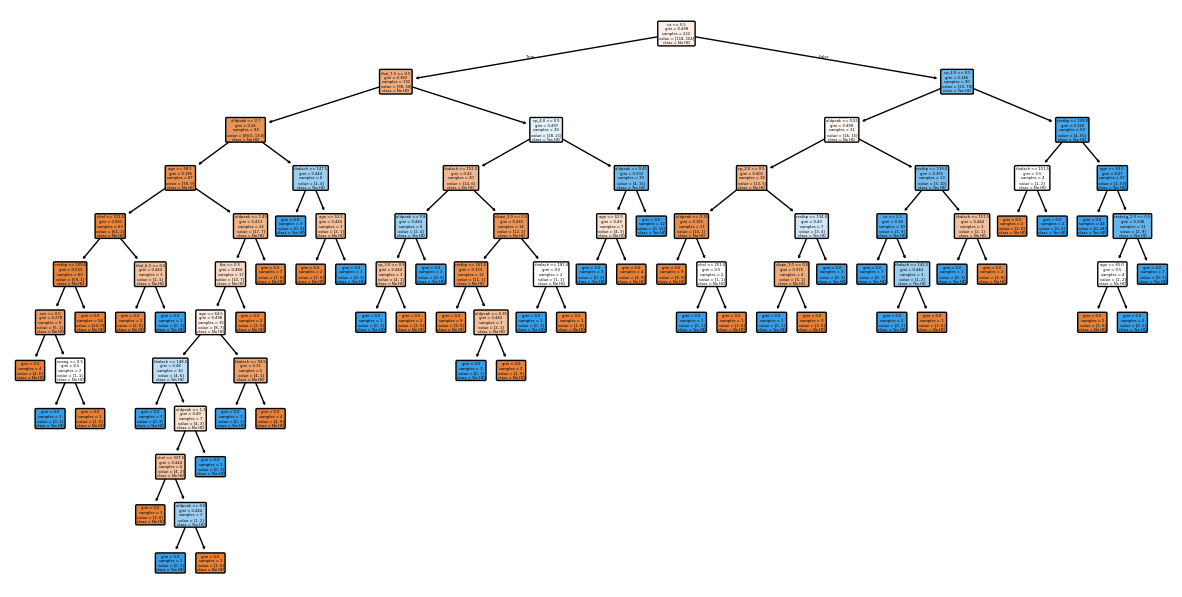

In [25]:
# Now we can use the plot_tree function to plot the whole tree

plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ["No HD", "Yes HD"],
          feature_names = X_encoded.columns);

# The semi - colon in the end is important or else the whole diagram won't show ip

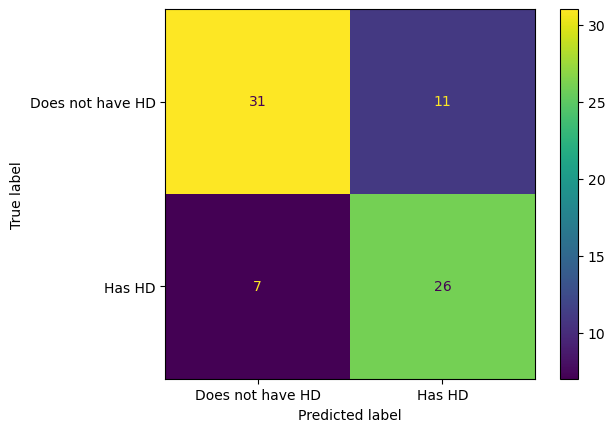

In [28]:
ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test, display_labels = ["Does not have HD", "Has HD"])

In [29]:
# We can prevent overfitting in a dt by using the params in the Dtclf function but we can also apply Cost Complexity Pruning for this/
# To use CCP, we need alphas or CCP Alphas which are the transition points for the different trees that we are going to get for each Pruned tree.

path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] # Here, we try to exclude the max value of ccp alpha as it will lead to the pruning of the whole tree.

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
    

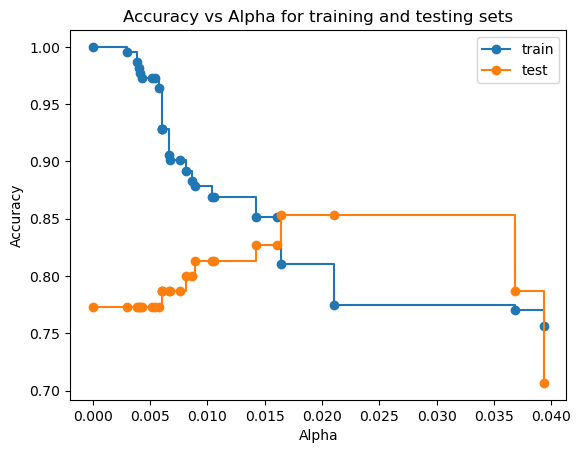

In [32]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for training and testing sets")

plt.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
plt.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")

plt.legend()
plt.show()

In [34]:
"""
From the graph above, we get the best alpha value to be 0.16 but we can also cross check it
using K - Folds Cross Validation to know the best value for alpha. What we'll do here is that
we will use the same alpha for 5 folds and store the validation error of each of these alpha 
and in the end whichever has the least amount of validation error is the alpha we have been 
searching for
"""


"\nFrom the graph above, we get the best alpha value to be 0.16 but we can also cross check it\nusing K - Folds Cross Validation to know the best value for alpha. What we'll do here is that\nwe will use the same alpha for 5 folds and store the validation error of each of these alpha \nand in the end whichever has the least amount of validation error is the alpha we have been \nsearching for\n"

<Axes: xlabel='alpha'>

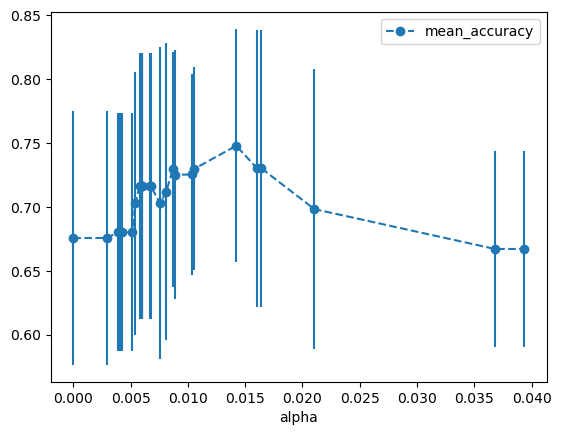

In [35]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [37]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)] ['alpha']

ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [40]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = float(ideal_ccp_alpha.iloc[0]))

clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

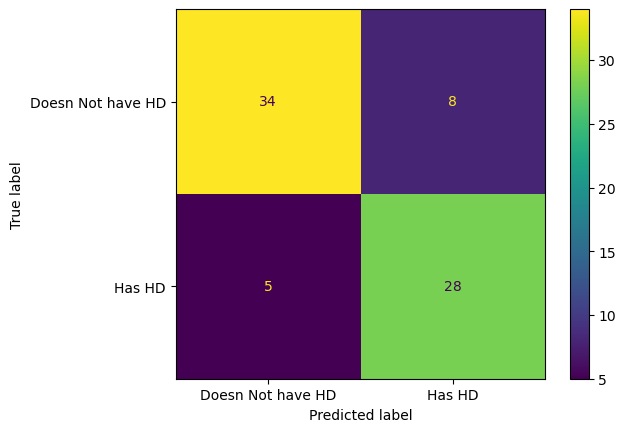

In [41]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, X_test, y_test, display_labels = ['Doesn Not have HD', "Has HD"])

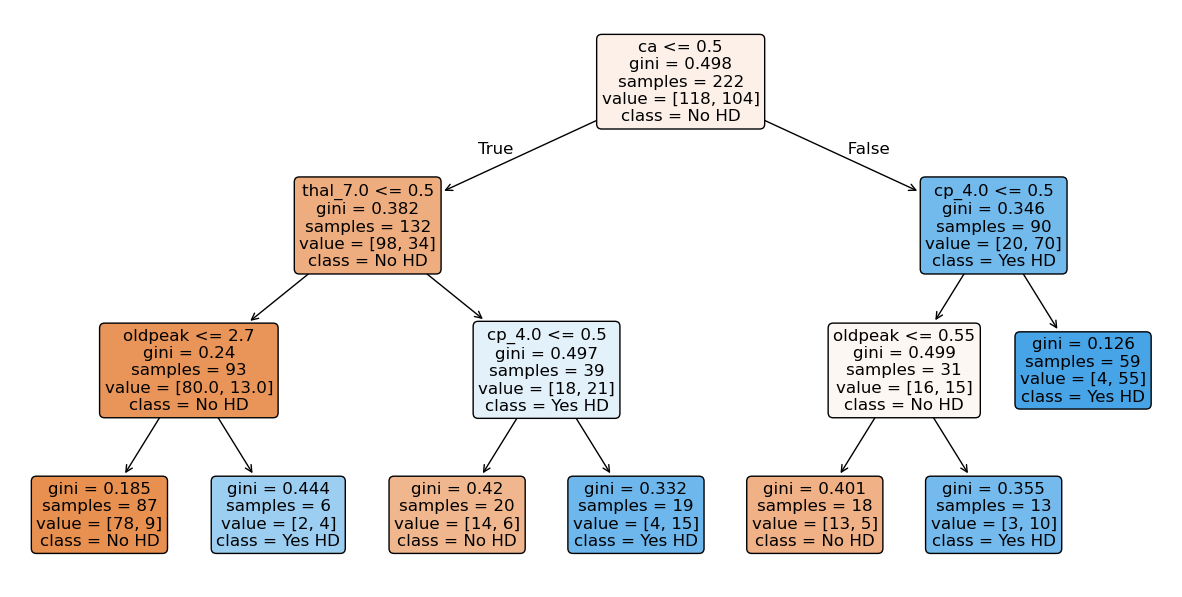

In [42]:

plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ["No HD", "Yes HD"],
          feature_names = X_encoded.columns);
